# 数据清洗

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 处理缺失值

### 侦查缺失值

In [4]:
df1 = pd.DataFrame([[3,5,3],
                   [1,6,np.nan],
                  ['lili',np.nan,'pop'],
                  [np.nan,'a','b']])
df1

,0,1,2
0,3,5,3
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [5]:
df1.isnull()

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [6]:
df1.notnull()

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


In [7]:
df1.isnull().sum() #查看每列缺失值数量

0    1
1    1
2    1
dtype: int64

In [9]:
df1.isnull().sum().sum() #全部缺失值数量

3

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      object
 1   1       3 non-null      object
 2   2       3 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


### 删除缺失值

In [11]:
df1.dropna()

,0,1,2
0,3,5,3


In [12]:
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [16]:
df2.iloc[2,:] = np.nan
df2[3] = np.nan
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [17]:
df2.dropna()

,0,1,2,3


In [18]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [20]:
df2.dropna(how='all') #删除全为 NaN 的行

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN


In [22]:
df2.dropna(how='all',axis=1) #删除全为 NaN 的列

,0,1,2
0,0.0,1.0,2.0
1,4.0,5.0,6.0
2,NaN,NaN,NaN


### 填充缺失值

In [23]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [24]:
df2.fillna(0)

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,0.0,0.0,0.0,0.0


In [25]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [26]:
df2.fillna({1:6,3:0}) #针对特定列上的 NanN 值填充特定的新值

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [27]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [28]:
df2.fillna({1:6,3:0},inplace=True)
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [29]:
df2.fillna(method='ffill')

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,4.0,6.0,6.0,0.0


In [30]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [31]:
df2.fillna(method='bfill')

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [32]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [35]:
df2[0] = df2[0].fillna(df2[0].mean()) #针对具体列进行填充
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,2.0,6.0,NaN,0.0


## 去重

In [38]:
data = {
    'name' : ['Alex', 'Anderson', 'Alex', 'Lena'],
    'sex' : ['female', 'male', 'female', 'female'],
    'year' : [2001, 3001, 2001, 5001],
    'city' : ['Shanghai', 'Shenzhen', 'Shanghai', 'Pingdingshan']
}
df1 = pd.DataFrame(data)
df1

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Alex,female,2001,Shanghai
3,Lena,female,5001,Pingdingshan


In [39]:
df1.duplicated() #检查是否存在重复值

0    False
1    False
2     True
3    False
dtype: bool

In [40]:
df1.drop_duplicates() #去重

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
3,Lena,female,5001,Pingdingshan


In [41]:
df1

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Alex,female,2001,Shanghai
3,Lena,female,5001,Pingdingshan


In [43]:
df1.drop_duplicates(['sex',]) #针对部分列进行去重

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen


In [44]:
df1.drop_duplicates(['sex',],keep='last') #保留最后出现的重复值

,name,sex,year,city
1,Anderson,male,3001,Shenzhen
3,Lena,female,5001,Pingdingshan


## 替换值

In [45]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'sex' : ['female', 'male', '', 'female'],
    'year' : [2001, 3001, 2001, 5001],
    'city' : ['Shanghai', 'Shenzhen', '', 'Pingdingshan']
}
df1 = pd.DataFrame(data)
df1

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,,2001,
3,Lena,female,5001,Pingdingshan


In [46]:
df1.replace('','不详')

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,不详,2001,不详
3,Lena,female,5001,Pingdingshan


In [47]:
df1

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,,2001,
3,Lena,female,5001,Pingdingshan


In [53]:
df1.replace({'male':'男','':'不详'})

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,男,3001,Shenzhen
2,Tom,不详,2001,不详
3,Lena,female,5001,Pingdingshan


## 利用函数进行数据转换

In [54]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'math' : [20, 31, 41, 51],
}
df2 = pd.DataFrame(data)
df2

,name,math
0,Alex,20
1,Anderson,31
2,Tom,41
3,Lena,51


In [57]:
def f(x):
    if x >= 50:
        return '(✿◡‿◡)'
    elif 40 <= x < 50:
        return '😠'
    else:
        return '🙅‍♂️'

In [58]:
df2['class'] = df2['math'].map(f)
df2

,name,math,class
0,Alex,20,🙅‍♂️
1,Anderson,31,🙅‍♂️
2,Tom,41,😠
3,Lena,51,(✿◡‿◡)


## 监测异常值

In [59]:
df3 = pd.DataFrame(np.arange(10), columns=['X'])
df3['Y'] = 2 * df3['X'] + 0.5
df3.iloc[9,1] = 185
df3

,X,Y
0,0,0.5
1,1,2.5
2,2,4.5
3,3,6.5
4,4,8.5
5,5,10.5
6,6,12.5
7,7,14.5
8,8,16.5
9,9,185.0


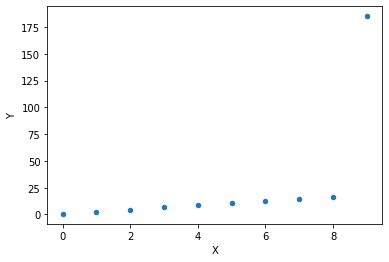

In [60]:
df3.plot(kind='scatter',x='X',y='Y')

## 虚拟变量

In [61]:
df = pd.DataFrame({
    '朝向':['东','南','东','西','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df

,朝向,价格
0,东,1200
1,南,2100
2,东,2300
3,西,2900
4,北,1400


In [64]:
pd.get_dummies(df['朝向'])

,东,北,南,西
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [65]:
df2 = pd.DataFrame({
    '朝向':['东/北','西/南','东','西/北','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df2

,朝向,价格
0,东/北,1200
1,西/南,2100
2,东,2300
3,西/北,2900
4,北,1400


In [71]:
dummies = df['朝向'].apply(lambda x:pd.Series(x.split('/')).value_counts())
dummies

,东,南,西,北
0,1.0,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,1.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,1.0


In [72]:
dummies = dummies.fillna(0).astype(int)
dummies

,东,南,西,北
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


# 数据合并与重塑

## merge:两个 df 按行合并

In [73]:
price = pd.DataFrame({
    'fruit':['apple','orange','banana'],
    'price':[23,34,56]
})
amount = pd.DataFrame({
    'fruit':['apple','orange','banana','pear','banana'],
    'amount':[3,4,5,6,7]
})

In [74]:
price

,fruit,price
0,apple,23
1,orange,34
2,banana,56


In [75]:
amount

,fruit,amount
0,apple,3
1,orange,4
2,banana,5
3,pear,6
4,banana,7


In [76]:
pd.merge(amount,price)

,fruit,amount,price
0,apple,3,23
1,orange,4,34
2,banana,5,56
3,banana,7,56


In [77]:
pd.merge(price,amount)

,fruit,price,amount
0,apple,23,3
1,orange,34,4
2,banana,56,5
3,banana,56,7


In [78]:
pd.merge(amount,price,on='fruit')

,fruit,amount,price
0,apple,3,23
1,orange,4,34
2,banana,5,56
3,banana,7,56


In [80]:
pd.merge(amount,price,left_on='fruit',right_on='fruit')

,fruit,amount,price
0,apple,3,23
1,orange,4,34
2,banana,5,56
3,banana,7,56


In [81]:
pd.merge(amount,price,how='left')

,fruit,amount,price
0,apple,3,23.0
1,orange,4,34.0
2,banana,5,56.0
3,pear,6,NaN
4,banana,7,56.0


In [82]:
pd.merge(amount,price,how='right')

,fruit,amount,price
0,apple,3,23
1,orange,4,34
2,banana,5,56
3,banana,7,56


In [83]:
pd.merge(amount,price,how='outer')

,fruit,amount,price
0,apple,3,23.0
1,orange,4,34.0
2,banana,5,56.0
3,banana,7,56.0
4,pear,6,NaN


## concat 链接

In [87]:
pd.concat([amount,price])

,fruit,amount,price
0,apple,3.0,NaN
1,orange,4.0,NaN
2,banana,5.0,NaN
3,pear,6.0,NaN
4,banana,7.0,NaN
0,apple,NaN,23.0
1,orange,NaN,34.0
2,banana,NaN,56.0


In [89]:
pd.concat([amount,price],axis=1)

,fruit,amount,fruit,price
0,apple,3,apple,23.0
1,orange,4,orange,34.0
2,banana,5,banana,56.0
3,pear,6,NaN,NaN
4,banana,7,NaN,NaN


In [90]:
pd.concat([amount,price],axis=1,join='inner')

,fruit,amount,fruit,price
0,apple,3,apple,23
1,orange,4,orange,34
2,banana,5,banana,56


In [93]:
pd.concat([amount,price],axis=1,join='inner',keys=['fruit','price'])

fruit          price      
    fruit amount   fruit price
0   apple      3   apple    23
1  orange      4  orange    34
2  banana      5  banana    56

In [94]:
pd.concat([amount,price])

,fruit,amount,price
0,apple,3.0,NaN
1,orange,4.0,NaN
2,banana,5.0,NaN
3,pear,6.0,NaN
4,banana,7.0,NaN
0,apple,NaN,23.0
1,orange,NaN,34.0
2,banana,NaN,56.0


In [95]:
pd.concat([amount,price],ignore_index=True)

,fruit,amount,price
0,apple,3.0,NaN
1,orange,4.0,NaN
2,banana,5.0,NaN
3,pear,6.0,NaN
4,banana,7.0,NaN
5,apple,NaN,23.0
6,orange,NaN,34.0
7,banana,NaN,56.0


## combine_first 合并

In [96]:
df1 = pd.DataFrame({
    'a':[3.0,np.nan,6.0,np.nan],
    'b':[np.nan,4.0,6.0,np.nan]
})
df2 = pd.DataFrame({
    'a':[0,1,2,3,4],
    'b':[0,1,2,3,4]
})

In [97]:
df1

,a,b
0,3.0,NaN
1,NaN,4.0
2,6.0,6.0
3,NaN,NaN


In [98]:
df2

,a,b
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [99]:
df1.combine_first(df2)

,a,b
0,3.0,0.0
1,1.0,4.0
2,6.0,6.0
3,3.0,3.0
4,4.0,4.0


## 数据重塑

In [100]:
df = pd.DataFrame(np.arange(9).reshape(3,3),index=['a','b','c',],columns=['one','two','three'])
df.index.name = 'alph'
df.columns.name = 'number'
df

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


### stack 列-->行

In [101]:
result = df.stack()
result

alph  number
a     one       0
      two       1
      three     2
b     one       3
      two       4
      three     5
c     one       6
      two       7
      three     8
dtype: int64

### unstack 行-->列

In [102]:
result.unstack()

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [103]:
result.unstack(0)

alph,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


In [104]:
result.unstack('alph')

alph,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


# 字符串处理

## 字符串方法

In [105]:
df = pd.DataFrame({
    'data':['张三|男','李四|男','王二麻子|女','芯是|女']
})
df

,data
0,张三|男
1,李四|男
2,王二麻子|女
3,芯是|女


In [110]:
result = df['data'].apply(lambda x : pd.Series(x.split('|')))
result

,0,1
0,张三,男
1,李四,男
2,王二麻子,女
3,芯是,女


In [112]:
new_df = df['data'].str.split('|')
new_df

0      [张三, 男]
1      [李四, 男]
2    [王二麻子, 女]
3      [芯是, 女]
Name: data, dtype: object

In [115]:
new_df.str[0]

0      张三
1      李四
2    王二麻子
3      芯是
Name: data, dtype: object

In [117]:
df['name'] = new_df.str[0]

In [118]:
df['sex'] = new_df.str[1]

In [119]:
df

,data,name,sex
0,张三|男,张三,男
1,李四|男,李四,男
2,王二麻子|女,王二麻子,女
3,芯是|女,芯是,女
